In [233]:
import numpy as np
import os
from random import choice, randint,sample
from PIL import Image, ImageOps
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.create_dataframe import read_data

In [234]:
def show_images(image_list):
    for i in image_list:
        plt.imshow(i)
        plt.pause(0.5)

def convertToArray(image_list):
    image_array_list=[]
    for i in image_list:
        image_array_list.append(np.asarray(i))
    return pd.Series(image_array_list)

def convertToImage(image_array_list):
    image_list=[]
    for i in image_array_list:
        image_list.append(Image.fromarray(i))
    return pd.Series(image_list)

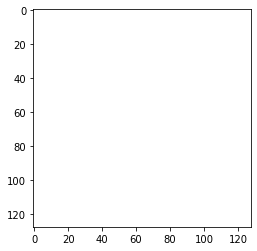

In [235]:
import cv2
import numpy as np

# create a white image
white = np.ones((128, 128, 3), dtype = np.uint8)
white = 255* white
white=Image.fromarray(white)

# display the image using opencv
plt.imshow(white)

In [237]:
reptiles=read_data(["Crocodile_Alligator","Gecko"])

In [238]:
def gen_pairs(num_memes,data):
    white = np.ones((128, 128, 3), dtype = np.uint8)
    white = 255* white
    white=Image.fromarray(white)
    paired_images=pd.DataFrame()
    for i in range(0,num_memes):
        #randomly choose a nicpic and a stock_image
        rep_type=choice(reptiles["target"].unique())
        images=sample(list(reptiles[reptiles["target"]==rep_type]["image"]),2)

        img0=Image.fromarray(images[0])
        img1=Image.fromarray(images[1])

        # get new dimensions for nic sticker
        # this lets us shrink so will be smaller than background
        # but keeps it in proportion
        resize_height_0=int(white.size[0]/2)
        resize_width_0= int((resize_height_0*img0.size[1])/img0.size[0])
        resize_height_1=int(white.size[0]/2)
        resize_width_1= int((resize_height_1*img1.size[1])/img1.size[0])

        # shrink nic sticker
        img0=img0.resize((resize_height_0,resize_width_0))
        img1=img1.resize((resize_height_1,resize_width_1))

        # get ranges for where sticker can go so 
        # it stays in bounds of the image
        max_height_0=white.size[0]-img0.size[0]
        max_width_0=white.size[1]-img0.size[1]
        max_height_1=white.size[0]-img1.size[0]
        max_width_1=white.size[1]-img1.size[1]
        height0=randint(0,max_height_0)
        width0=randint(0,max_width_0)
        height1=randint(0,max_height_1)
        width1=randint(0,max_width_1)

        # superimpose and add to meme list
        m=white.copy()
        m.paste(img0, (height0,width0), mask = img0)
        m.paste(img1, (height1,width1), mask = img1)
        df=pd.DataFrame({"image":[m]})
        df["target"]=rep_type

        paired_images=pd.concat([paired_images,df])
        paired_images["image"]=paired_images["image"].apply(lambda x:np.asarray(x))

    return paired_images

In [ ]:
df=gen_pairs(2800,reptiles)

In [ ]:
df.target.value_counts()

Salamander         585
Turtle_Tortoise    573
Lizard             559
Frog_Toad          543
Snake              540
Name: target, dtype: int64